# Verify the Aruco sensorprocessing

This notebook verifies that the Aruco sensorprocessing detects the markers in the images. 

In [1]:
import sys
sys.path.append("..")
from settings import Config
import os
import pathlib
import pprint
import matplotlib.pyplot as plt

from sensorprocessing import sp_helper
from sensorprocessing import sp_aruco
from helper import ui_choose_task, ui_choose_demo
import random
import torch
# Move data to GPU (if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
# Specify the experiment
experiment = "sensorprocessing_aruco"
run = "aruco_128" 
exp = Config().get_experiment(experiment, run)
pprint.pprint(exp)
sp = sp_aruco.ArucoSensorProcessing(exp, device)

Loading pointer config file: C:\Users\lboloni\.config\BerryPicker\mainsettings.yaml
Loading machine-specific config file: G:\My Drive\LotziStudy\Code\PackageTracking\BerryPicker\settings\settings-LotziYoga.yaml
Configuration for experiment: sensorprocessing_aruco/aruco_128 successfully loaded
{'MARKER_COUNT': 10,
 'XMAX': 1000,
 'YMAX': None,
 'data_dir': WindowsPath('c:/Users/lboloni/Documents/Code/_TempData/BerryPicker-experiments/sensorprocessing_aruco/aruco_128'),
 'exp_run_sys_dep_file': WindowsPath('G:/My Drive/LotziStudy/Code/PackageTracking/BerryPicker/settings/experiment-config/LotziYoga/sensorprocessing_aruco/aruco_128_sysdep.yaml'),
 'exp_run_sys_indep_file': WindowsPath('C:/Users/lboloni/Documents/Code/_Checkouts/BerryPicker/src/experiment_configs/sensorprocessing_aruco/aruco_128.yaml'),
 'group_name': 'sensorprocessing_aruco',
 'latent_size': 128,
 'run_name': 'aruco_128',
 'validation_demo': '2024_12_26__16_44_06',
 'validation_task': 'proprio_sp_validation'}


torch.Size([1, 3, 256, 256])
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1.]
torch.Size([1, 3, 256, 256])
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.

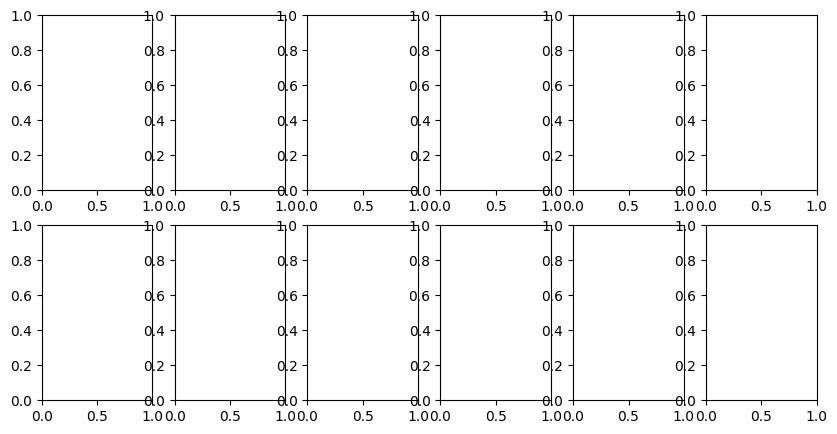

In [3]:
# Choose the demonstration (interactively or the on in the exp)
# choice == "interactive"
choice = "experiment-spec"

if choice == "interactive":
    # task_id = None; demo_id = None
    task_id = 5; demo_id = 0
    _, task_dir = ui_choose_task(offer_task_creation=True, task_id=task_id)
    print(task_dir)
    demo_dir = ui_choose_demo(task_dir, demo_id=demo_id)
if choice == "experiment-spec":
    # FIXME write here the 
    demos_top = pathlib.Path(Config()["demos"]["directory"])
    demo_dir = pathlib.Path(demos_top, "demos", exp["validation_task"], exp["validation_demo"])

# Choose n pictures from the validation set
n = 6
jpg_files = list(demo_dir.glob("*.jpg"))
randomjpg = random.sample(jpg_files, n)
# Visualize the original and reconstructed pictures 
fig, axs = plt.subplots(2, n, figsize=(10, 5))
for i in range(n):
    z = sp.process_file(randomjpg[i])
    print(z)
